*Chicago has always been in news during the election years for the wrong reasons. Politicians bring up the issue of the number of crimes in Chicago. This notebook will take a look at the Chicago Crimes dataset for the year 2022.*

In [177]:
## importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
### Loading the datasets
crimes = pd.read_csv("data/ChicagoCrimes_2022.csv")

In [179]:
crimes.to_parquet('ChicagoCrimes2022.parquet')

ArrowInvalid: ("Could not convert '' with type str: tried to convert to double", 'Conversion failed for column Ward with type object')

In [64]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12648362,JF181248,03/16/2022 02:00:00 PM,045XX S VINCENNES AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,3.0,38,11,1180381.0,1874867.0,2022,04/06/2023 05:05:58 PM,41.811898,-87.613884,"(41.811898033, -87.613883795)"
1,13032945,JG212426,10/23/2022 12:00:00 PM,006XX W IRVING PARK RD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,True,...,46.0,6,26,NaN,NaN,2022,04/06/2023 05:05:58 PM,NaN,NaN,NaN
2,12713141,JF259485,05/29/2022 12:00:00 AM,014XX S MUSEUM CAMPUS DR,0870,THEFT,POCKET-PICKING,SPORTS ARENA / STADIUM,False,False,...,4.0,33,06,NaN,NaN,2022,06/05/2022 04:48:59 PM,NaN,NaN,NaN
3,13032436,JG211735,04/20/2022 12:01:00 AM,039XX S CALIFORNIA AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,POLICE FACILITY / VEHICLE PARKING LOT,False,False,...,12.0,58,17,NaN,NaN,2022,04/06/2023 05:05:58 PM,NaN,NaN,NaN
4,13032739,JG208574,03/01/2022 12:01:00 AM,021XX N KIMBALL AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,26.0,22,06,NaN,NaN,2022,04/06/2023 05:05:58 PM,NaN,NaN,NaN


In [65]:
crimes = crimes.fillna('')

In [66]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12648362,JF181248,03/16/2022 02:00:00 PM,045XX S VINCENNES AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,3.0,38,11,1180381.0,1874867.0,2022,04/06/2023 05:05:58 PM,41.811898,-87.613884,"(41.811898033, -87.613883795)"
1,13032945,JG212426,10/23/2022 12:00:00 PM,006XX W IRVING PARK RD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,True,...,46.0,6,26,,,2022,04/06/2023 05:05:58 PM,,,
2,12713141,JF259485,05/29/2022 12:00:00 AM,014XX S MUSEUM CAMPUS DR,0870,THEFT,POCKET-PICKING,SPORTS ARENA / STADIUM,False,False,...,4.0,33,06,,,2022,06/05/2022 04:48:59 PM,,,
3,13032436,JG211735,04/20/2022 12:01:00 AM,039XX S CALIFORNIA AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,POLICE FACILITY / VEHICLE PARKING LOT,False,False,...,12.0,58,17,,,2022,04/06/2023 05:05:58 PM,,,
4,13032739,JG208574,03/01/2022 12:01:00 AM,021XX N KIMBALL AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,26.0,22,06,,,2022,04/06/2023 05:05:58 PM,,,


### Exploring the number of records

In [67]:
## Total records in the report
crimes.shape

(238034, 22)

In [70]:
crimes.drop_duplicates().shape

(238034, 22)

In [73]:
crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                            object
Community Area                   int64
FBI Code                        object
X Coordinate                    object
Y Coordinate                    object
Year                             int64
Updated On                      object
Latitude                        object
Longitude                       object
Location                        object
dtype: object

### Crimes based on the Various Parameters 


In [78]:
# Convert 'datetime' column to datetime type
crimes['Date'] = crimes['Date'].dt.normalize()


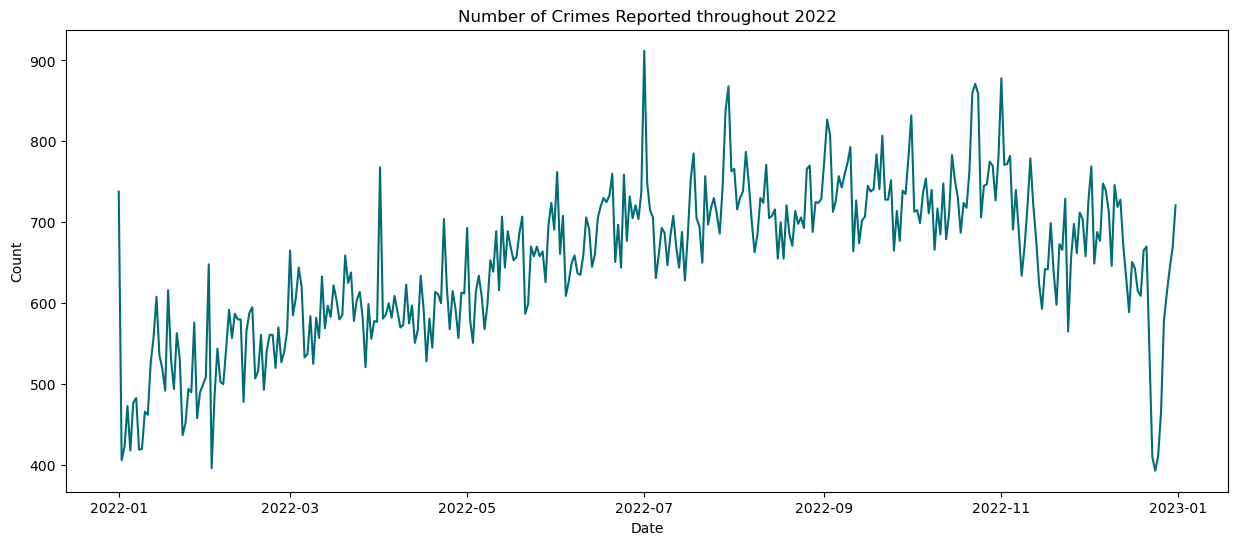

In [85]:
datetimes = crimes.Date.value_counts().reset_index()
datetimes.columns = ['Date', 'Count']

f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=datetimes, x = 'Date', y = 'Count', color = '#006d77')
plt.title('Number of Crimes Reported throughout 2022')
plt.show()

In [149]:
crimes['Primary Type'].value_counts().reset_index()[:10]

,Primary Type,count
0,THEFT,54734
1,BATTERY,40876
2,CRIMINAL DAMAGE,27231
3,MOTOR VEHICLE THEFT,21432
4,ASSAULT,20781
5,DECEPTIVE PRACTICE,16038
6,OTHER OFFENSE,14503
7,ROBBERY,8971
8,WEAPONS VIOLATION,8752
9,BURGLARY,7595


In [153]:
crimes['Location Description'].value_counts().reset_index()[:10]

,Location Description,count
0,STREET,67576
1,APARTMENT,45326
2,RESIDENCE,30281
3,SIDEWALK,12018
4,PARKING LOT / GARAGE (NON RESIDENTIAL),9313
5,SMALL RETAIL STORE,7248
6,ALLEY,5005
7,RESTAURANT,4858
8,OTHER (SPECIFY),3560
9,COMMERCIAL / BUSINESS OFFICE,3551


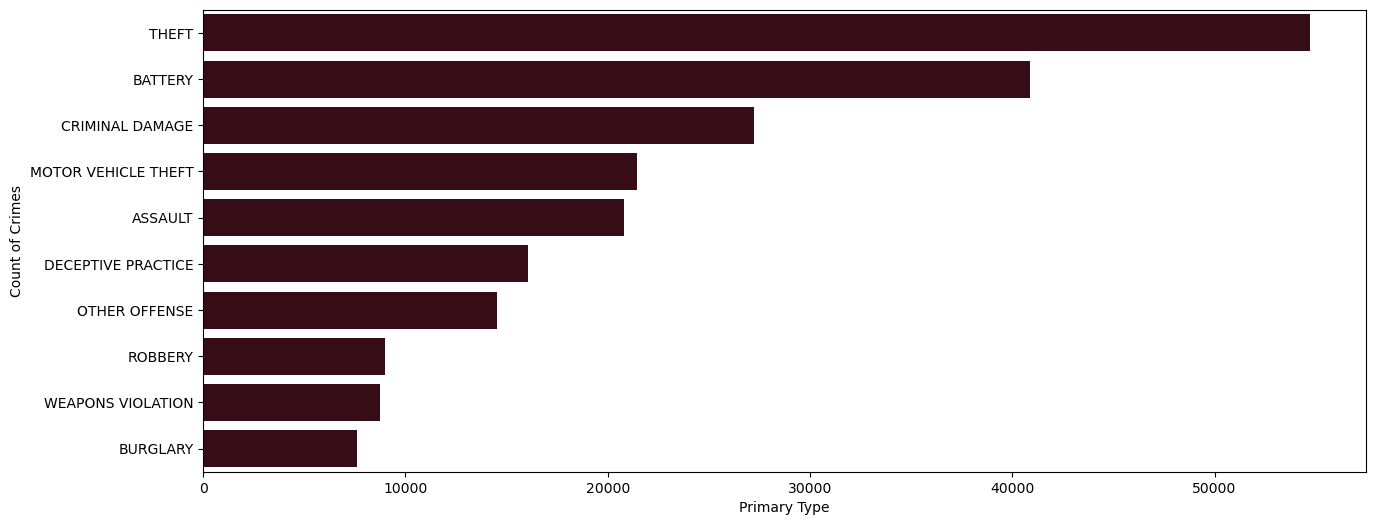

In [95]:
primary = crimes['Primary Type'].value_counts().reset_index()[:10]

## Plotting 
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(data=primary, y = 'Primary Type', x = 'count', color="#3d0612")
plt.xlabel("Primary Type")
plt.ylabel("Count of Crimes")
plt.show()

### Line plots of the top 3 Primary Types of Crimes

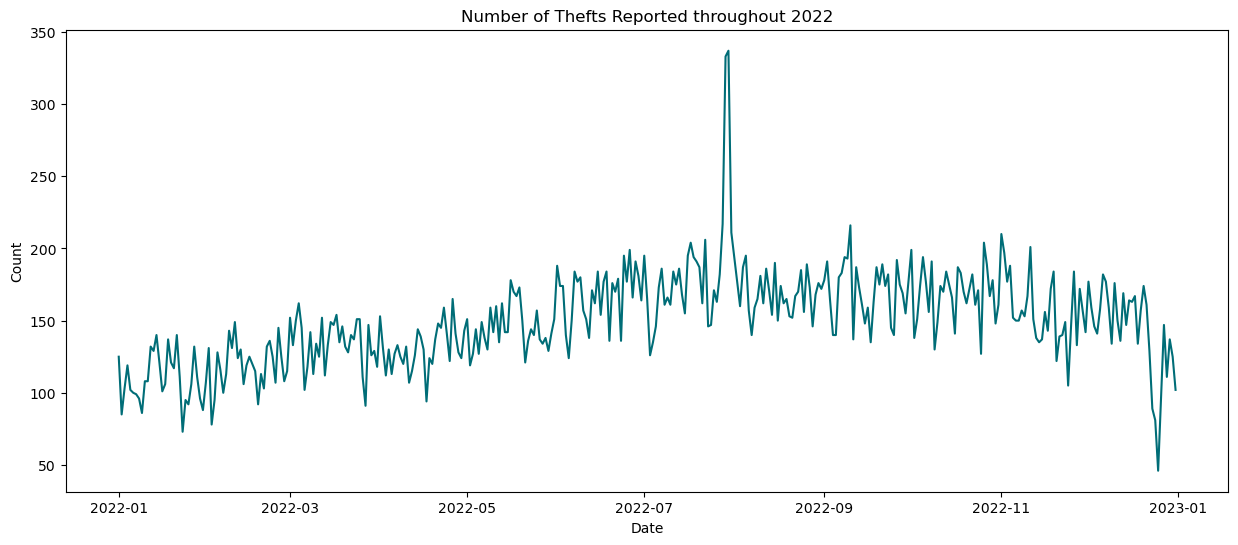

In [108]:
datetimes = crimes[crimes['Primary Type'] == "THEFT"].Date.value_counts().reset_index()
datetimes.columns = ['Date', 'Count']

f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=datetimes, x = 'Date', y = 'Count', color = '#006d77')
plt.title('Number of Thefts Reported throughout 2022')
plt.show()

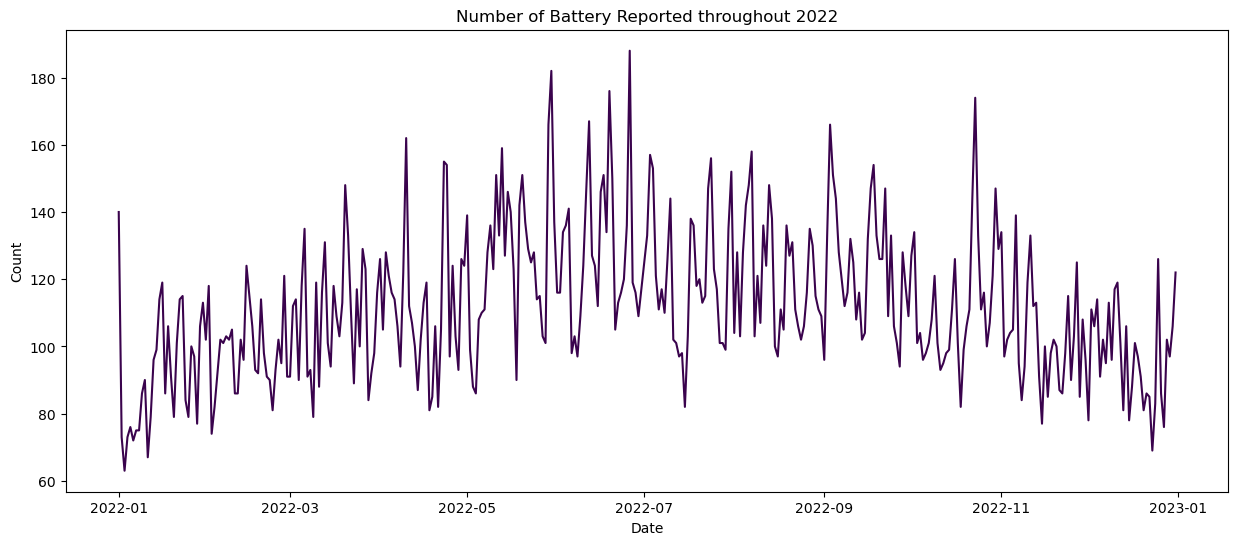

In [112]:
datetimes = crimes[crimes['Primary Type'] == "BATTERY"].Date.value_counts().reset_index()
datetimes.columns = ['Date', 'Count']

f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=datetimes, x = 'Date', y = 'Count', color = '#3a034d')
plt.title('Number of Battery Reported throughout 2022')
plt.show()

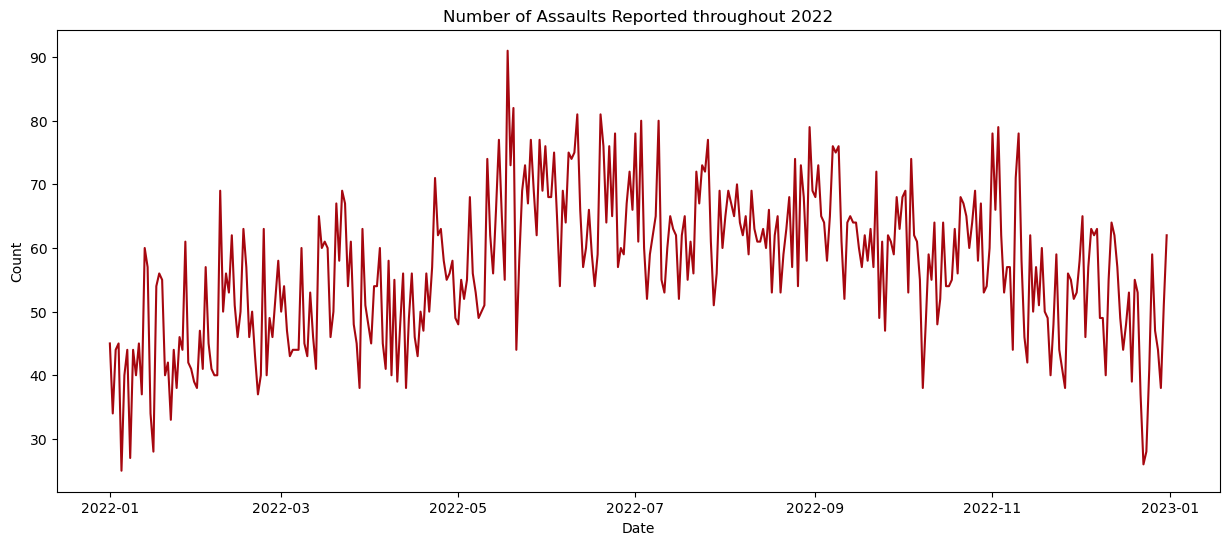

In [120]:
datetimes = crimes[crimes['Primary Type'] == "ASSAULT"].Date.value_counts().reset_index()
datetimes.columns = ['Date', 'Count']

f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=datetimes, x = 'Date', y = 'Count', color = '#a6070f')
plt.title('Number of Assaults Reported throughout 2022')
plt.show()

### Heatmaps of the Top 10 Primary Types

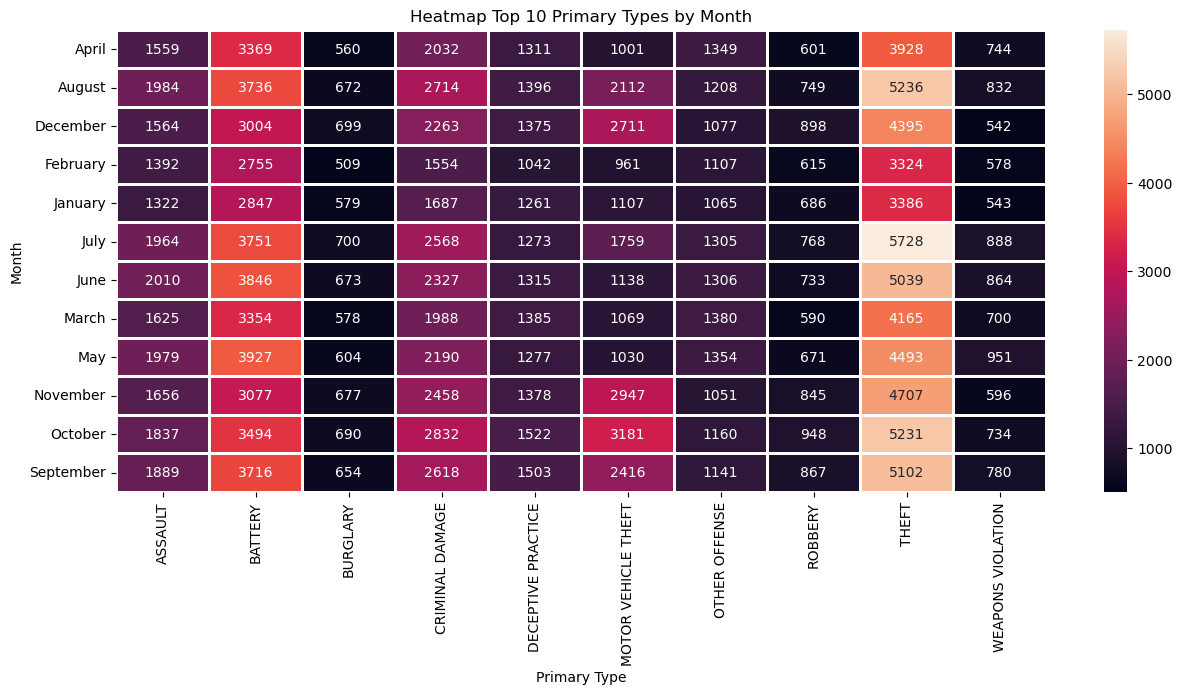

In [148]:
crimes['Month'] = crimes['Date'].dt.month_name()
heats = crimes[crimes['Primary Type'].isin(primary['Primary Type'])][['Month', 'Primary Type']].value_counts().reset_index()
heats = heats.pivot(index="Month", columns="Primary Type", values="count")
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.heatmap(heats, annot=True, linewidths = 1, fmt = 'd')
plt.title("Heatmap Top 10 Primary Types by Month")
plt.show()

### Exploring based on the Location

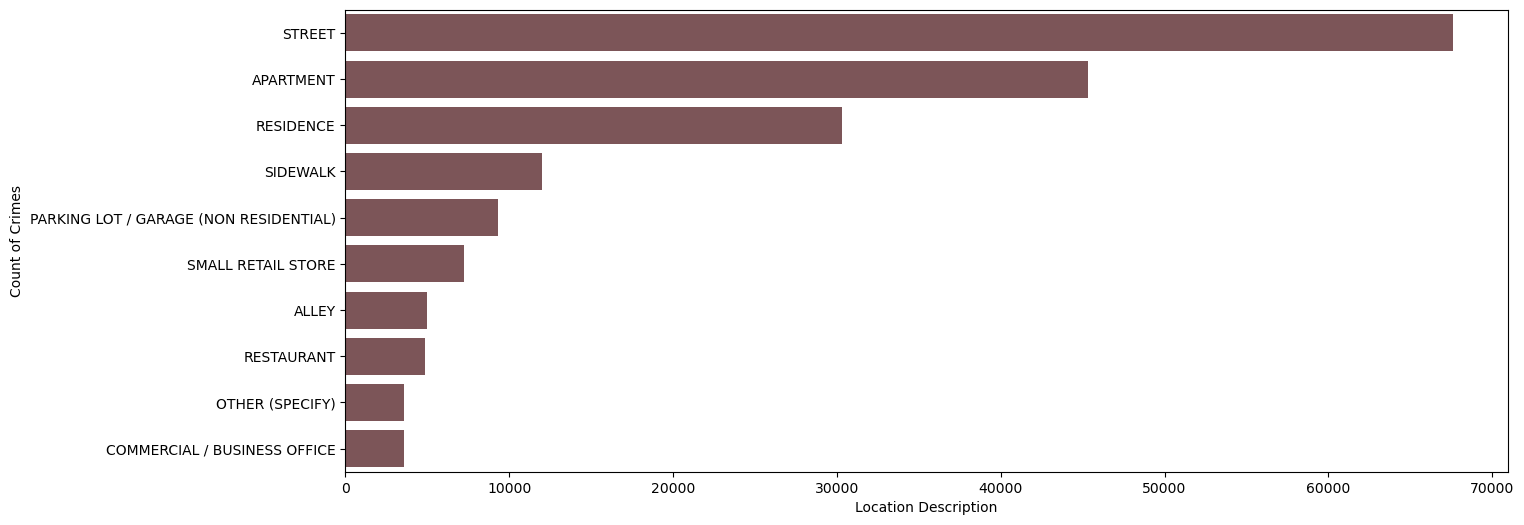

In [162]:
location = crimes['Location Description'].value_counts().reset_index()[:10]

## Plotting 
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(data=location, y = 'Location Description', x = 'count', color="#824f52")
plt.xlabel("Location Description")
plt.ylabel("Count of Crimes")
plt.show()

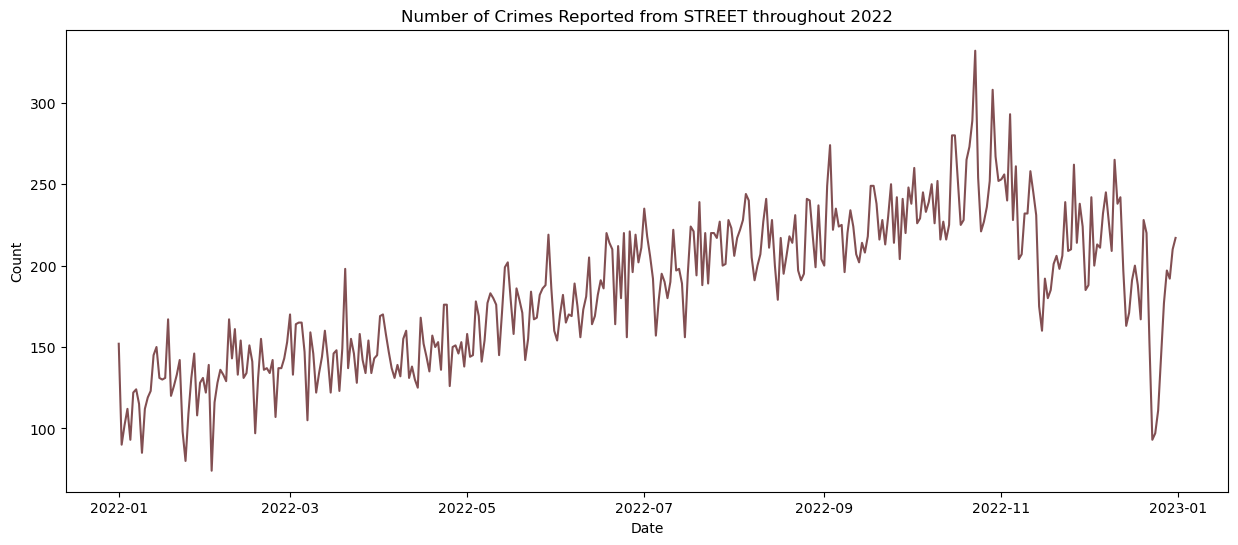

In [159]:
datetimes = crimes[crimes['Location Description'] == "STREET"].Date.value_counts().reset_index()
datetimes.columns = ['Date', 'Count']

f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=datetimes, x = 'Date', y = 'Count', color = '#824f52')
plt.title('Number of Crimes Reported from STREET throughout 2022')
plt.show()

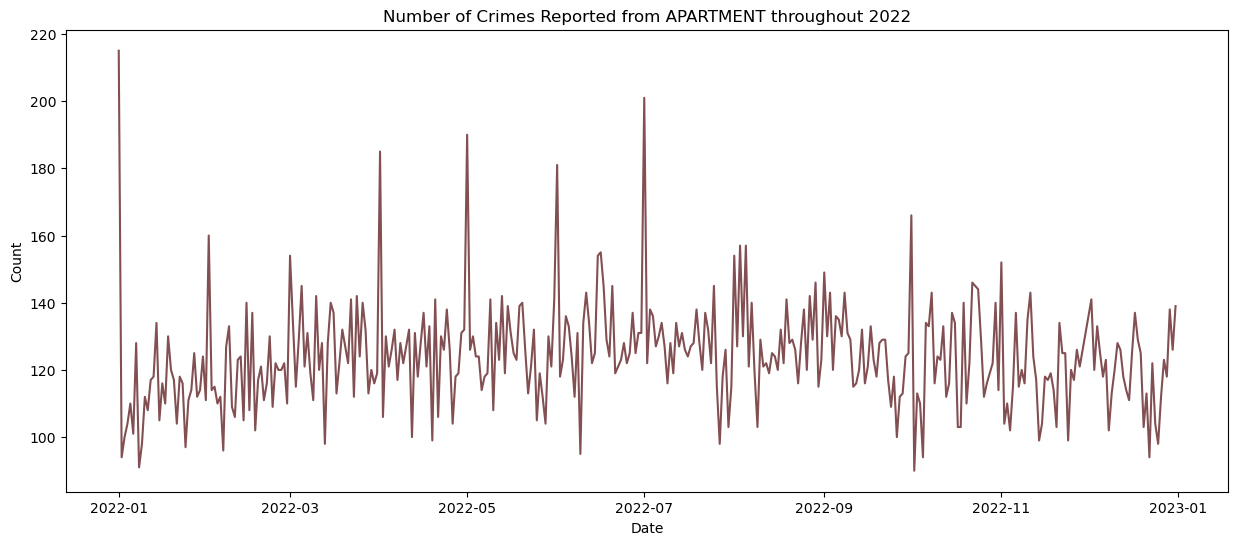

In [160]:
datetimes = crimes[crimes['Location Description'] == "APARTMENT"].Date.value_counts().reset_index()
datetimes.columns = ['Date', 'Count']

f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=datetimes, x = 'Date', y = 'Count', color = '#824f52')
plt.title('Number of Crimes Reported from APARTMENT throughout 2022')
plt.show()

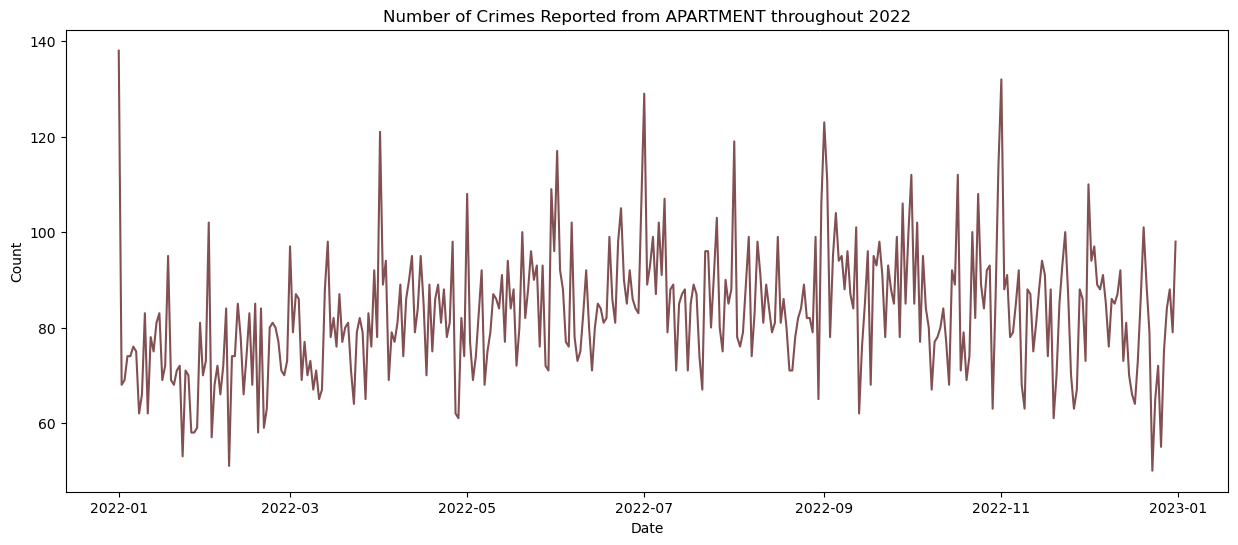

In [161]:
datetimes = crimes[crimes['Location Description'] == "RESIDENCE"].Date.value_counts().reset_index()
datetimes.columns = ['Date', 'Count']

f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=datetimes, x = 'Date', y = 'Count', color = '#824f52')
plt.title('Number of Crimes Reported from APARTMENT throughout 2022')
plt.show()

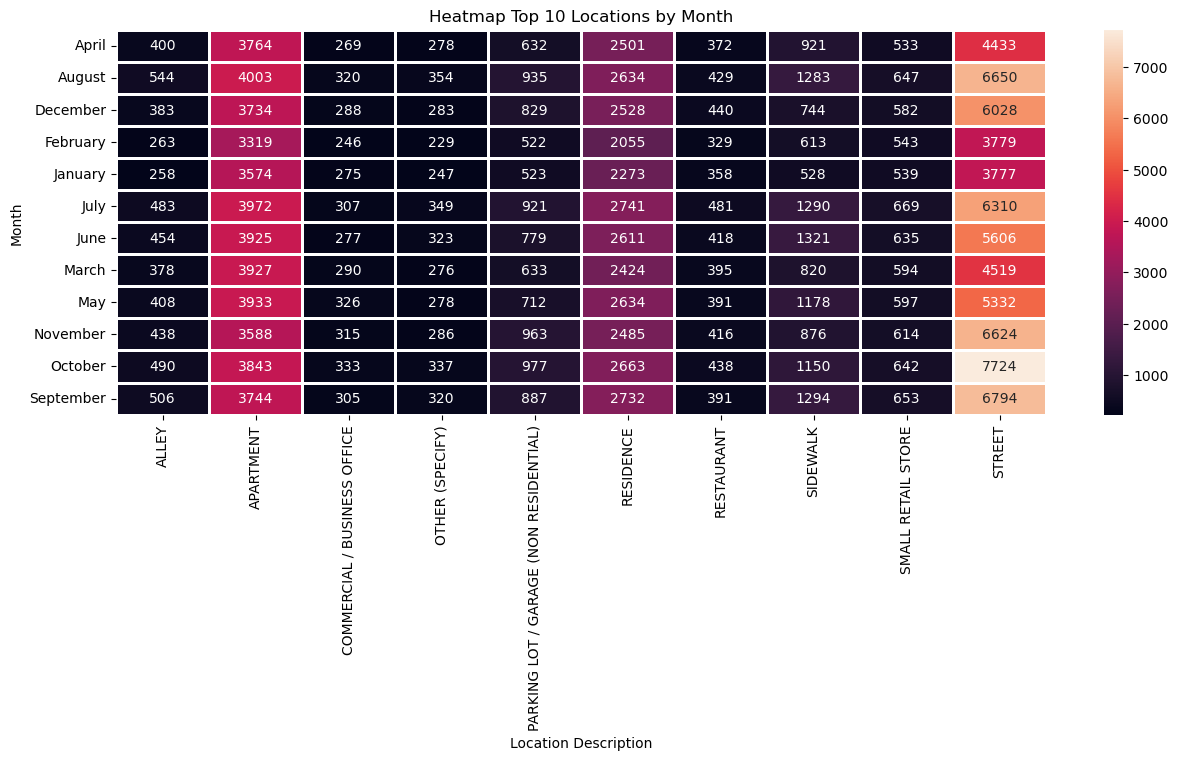

In [173]:
heats = crimes[crimes['Location Description'].isin(location['Location Description'])][['Month', 'Location Description']].value_counts().reset_index()
heats = heats.pivot(index="Month", columns="Location Description", values="count")
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.heatmap(heats, annot=True, linewidths = 1, fmt = 'd')
plt.title("Heatmap Top 10 Locations by Month")
plt.show()

### Crimes by Arrest and Domestic

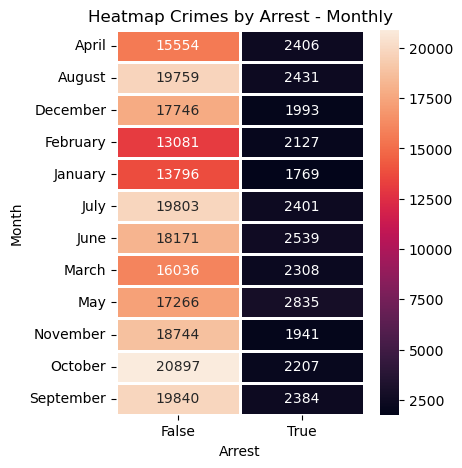

In [176]:
heats = crimes[['Month', 'Arrest']].value_counts().reset_index()
heats = heats.pivot(index="Month", columns="Arrest", values="count")
f, ax = plt.subplots(figsize=(4, 5))
ax = sns.heatmap(heats, annot=True, linewidths = 1, fmt = 'd')
plt.title("Heatmap Crimes by Arrest - Monthly")
plt.show()

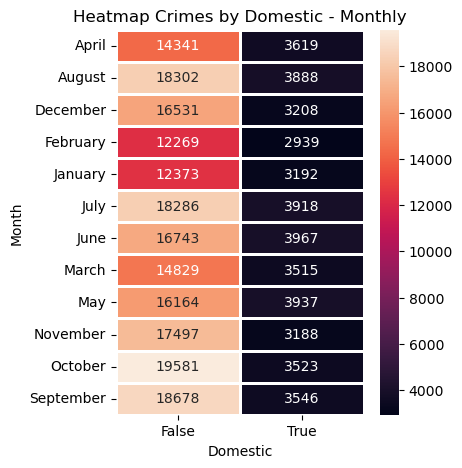

In [175]:
heats = crimes[['Month', 'Domestic']].value_counts().reset_index()
heats = heats.pivot(index="Month", columns="Domestic", values="count")
f, ax = plt.subplots(figsize=(4, 5))
ax = sns.heatmap(heats, annot=True, linewidths = 1, fmt = 'd')
plt.title("Heatmap Crimes by Domestic - Monthly")
plt.show()